# Dragon Real Estate price predictor


In [1]:
import pandas as pd

**dataframe**

In [2]:
housing = pd.read_csv("data.csv")

**show top 5 rows**

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**This will help to analyse that is there any null value or not , if there is then it will be removed or some changes will be done**

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

**25% : 25% value isse km h , vese hi baki**

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

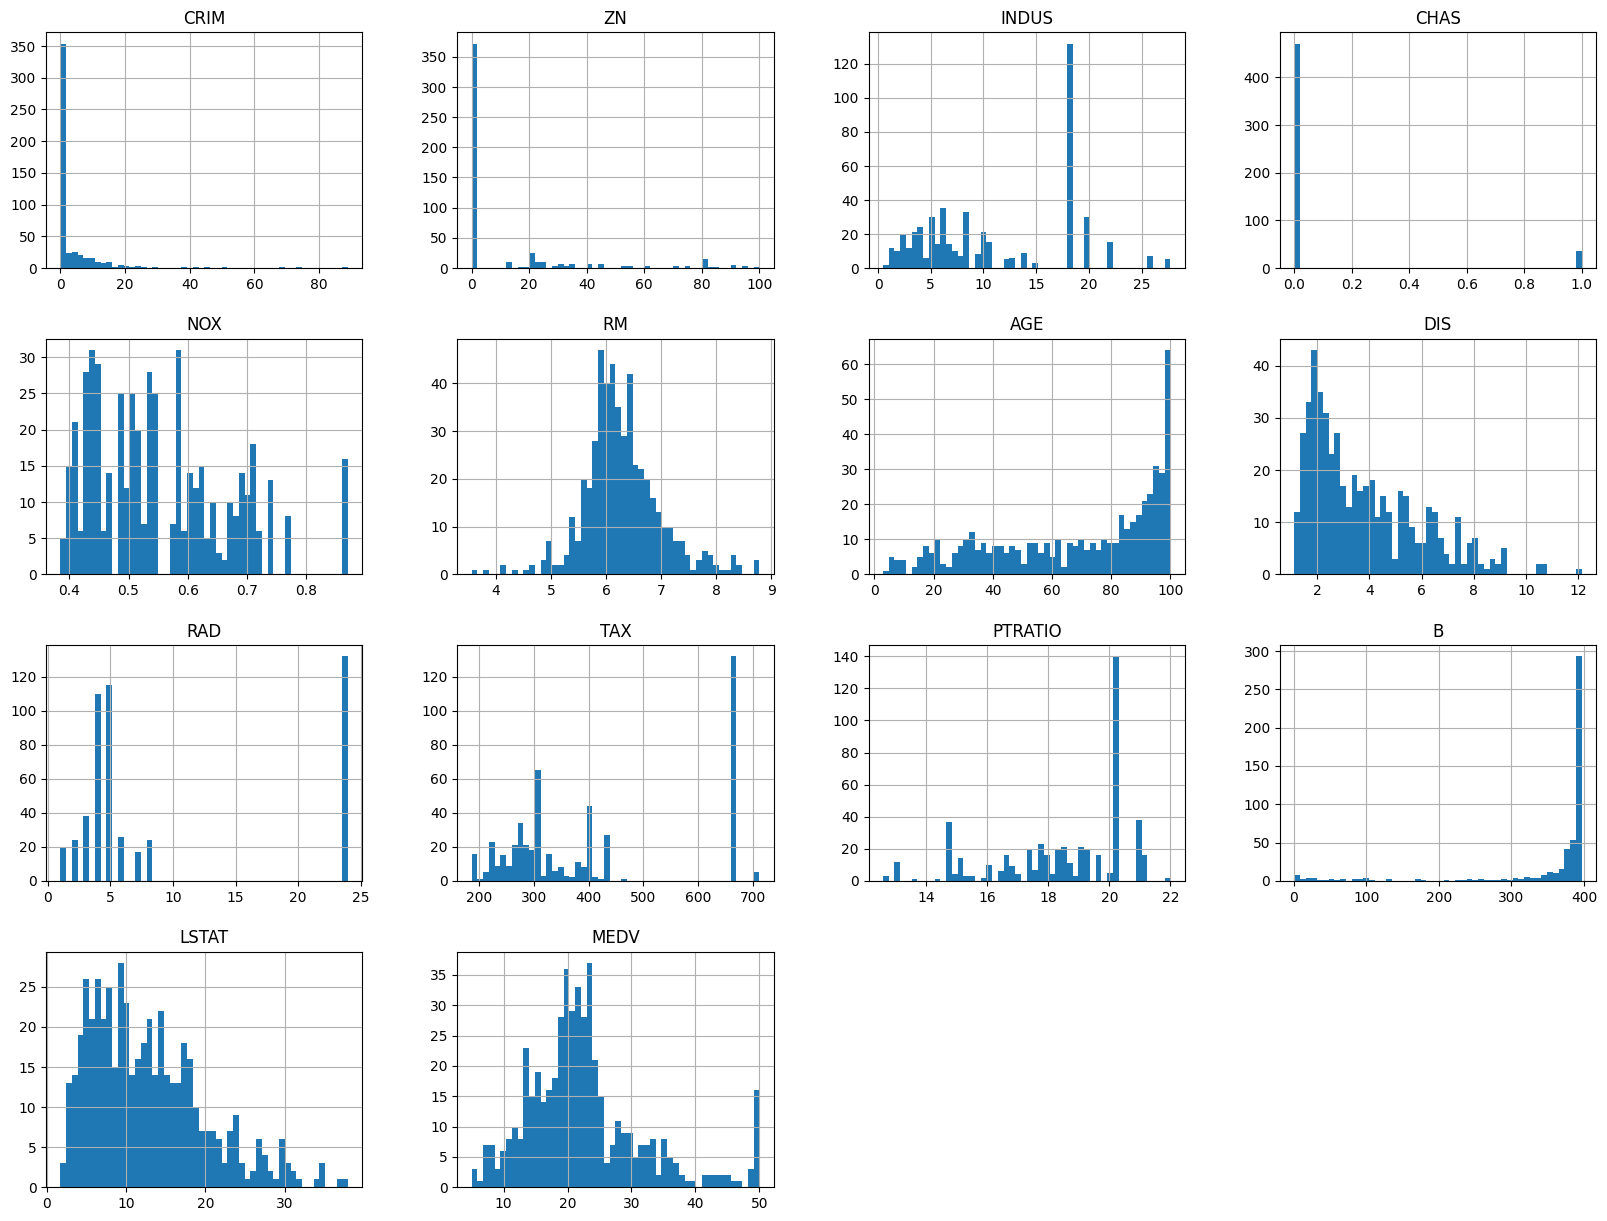

In [9]:
housing.hist(bins=50, figsize=(20,15))

# Train-Test Splitting

**here we have created one function which will return two data frames (  train and test ). 
It will take two parameters: data and test_ratio
np.random.permutaion will help to shuffle the dataset, 
here random.seed is used to keep the permutaion constant and not change with each run of the code.
Size of test frame = total size * test_ratio (here, 506*0.2 = 101)
pehle 405 train ke liye baki 101 test ke liye.**


In [10]:
# import numpy as np
# def split_train_test(data, test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]
    

In [11]:
# train_set, test_set = split_train_test(housing, 0.2)
 

In [12]:
# len(train_set)

In [13]:
# len(test_set)

**Scikit-learn me ye train-test-split fun already defined h so we can directly use it**

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

**There may be chances that all 405 data has the CHAS value 0 and hene our model will think that CHAS is always 0 .. so to re
move such wrong patterns we will do stratified sampling.**

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
                                           

In [16]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [17]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [18]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [19]:
# 95/7

In [20]:
# 376/28

In [21]:
housing = strat_train_set.copy()

# Looking for correlations

**Making cor-relation matrix:**

In [22]:
corr_matrix = housing.corr()

**if value of correlation is 1 it means: strong positive correlation**

In [23]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

**if value of correlation is positive and near to 1 then it is strong positive correlation that means with increase in its valuse will led to increase in others value and vice versa for negative coorelations**

array([[<Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

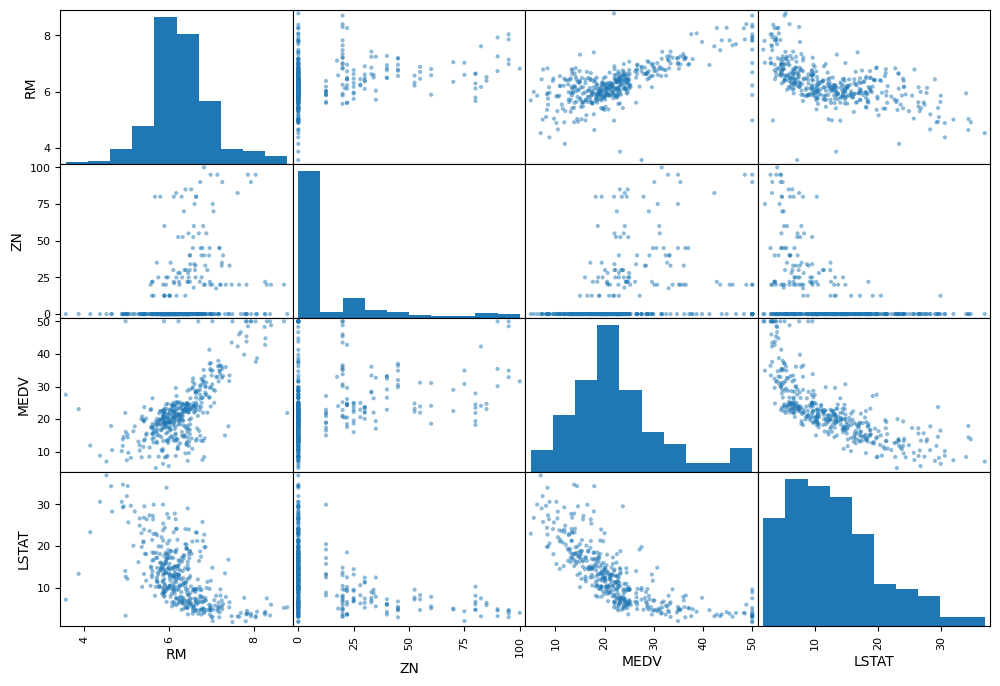

In [24]:
from pandas.plotting import scatter_matrix
attributes = ["RM", "ZN", "MEDV", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

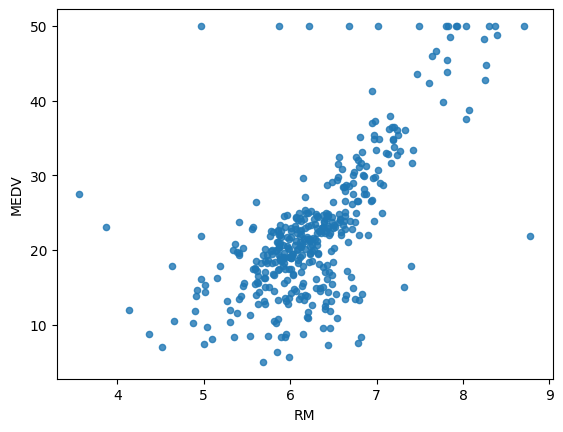

In [25]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying out Attribute combinations

In [26]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [27]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [28]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525160
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

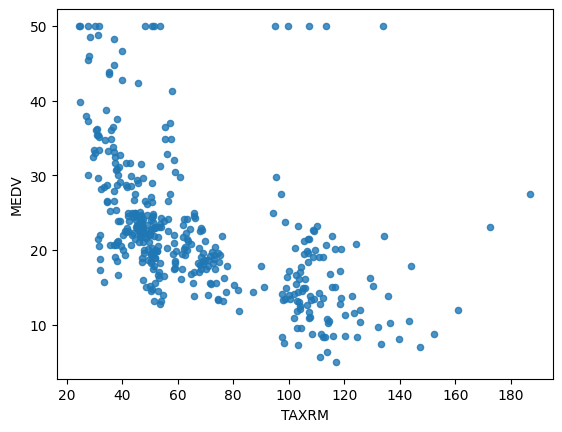

In [29]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [30]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

To take care of missing attributes, we have 3 options:
   1. Get rid of the missing data points
   2. Get rid of whole attribute
   3. Set the value to some value(0 or mean or median)

Disadvantages of the options
1. If we have a large no. missing value of a particular attribute then removing the while data point can be costly and large loss of data can be encountered
2. Suppose that particular attribute has very high positive correlation then we can't remove that attributes entry.
3. This can be done.

In [31]:
a = housing.dropna(subset=["RM"]) #option 1
a.shape

(404, 13)

In [32]:
housing.drop("RM", axis=1) #option 2
#Now after this RM col will be dropped , the original housing dataframe will remain unchanged

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [33]:
median = housing["RM"].median() 
#computing median for option 3

In [34]:
median

6.21

In [35]:
housing["RM"].fillna(median) # option 3
# Note that the original housing dataframe will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [36]:
housing.describe() # before we started filling misssing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [38]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [39]:
X = imputer.transform(housing)

In [40]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

housing_tr.describe()

## Scikit-learn design

Primarily 3 kinds of objects:
1) Estimators - estimate some parameters based on a dataset Eg- Imputer
It has a fit method and a transform method. Fit method - Fits the dataset and calculates internal parameters

2) Transformers - transform method takes input and return output based on the learning from fit()
It also has a convenience function called fit_transform() with fits and then transforms.

3) Predictors - LineraRegression model is an example of predictor. fit() and predict()
are two common functions. It alsogives score function which will evaluate the predictions.

## Feature Scaling

Making the scale of each attribute same.
Primarily there are two types of feature scaling method:
1. Min-Max scaling (Normalization)
     (value-min)/(max-min)
      Sklearn provide a class called MinMaxScaler for this.
      Value comes between 0 and 1

2. Standardization
      (value-mean)/standard-division)
      sklearn provides a class called StandardScaler for this

## Creating Pipeline

Pipeline: creating something so that we can easily do changes in our model and change the strategies easily.

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
    
])


In [42]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [43]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

# Selecting  a desired model for Dragon Real Estates

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression(), it gave very high value of rmse
# model = DecisionTreeRegressor(), it gave 0 value of rmse ...overfitting 
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [45]:
some_data = housing.iloc[:5]

In [46]:
some_labels = housing_labels.iloc[:5]

In [47]:
prepared_data = my_pipeline.transform(some_data)

In [48]:
model.predict(prepared_data)

array([22.489, 25.529, 16.561, 23.317, 23.604])

In [49]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the Model

In [50]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [51]:
rmse

1.2088551043720392

# Using Better evaluation technique- cross vaidation

In [52]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [53]:
rmse_scores

array([2.79582938, 2.71444996, 4.59218695, 2.66795734, 3.56107675,
       2.60303237, 4.51283826, 3.3712909 , 2.99874624, 3.4247835 ])

In [54]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [55]:
print_scores(rmse_scores)

Scores: [2.79582938 2.71444996 4.59218695 2.66795734 3.56107675 2.60303237
 4.51283826 3.3712909  2.99874624 3.4247835 ]
Mean:  3.3242191626463153
Standard deviation:  0.692583927493165


Quiz: Convert this notebook into a python file and run the pipeline using Visual Studio Code

## Saving the model

In [56]:
from joblib import dump, load
dump(model, 'Dragon.joblib') 

['Dragon.joblib']

## Testing the model on test data

In [57]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(Y_test))

In [58]:
final_rmse

2.8762951609563947

In [59]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the model

In [60]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([25.325])